In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default="plotly_white"

ModuleNotFoundError: No module named 'numpy'

In [4]:
df=pd.read_csv("compressed_data.csv")

NameError: name 'pd' is not defined

In [4]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
df.drop(columns={'house_rules','license'},axis=1,inplace=True)

In [8]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Convert it to date and time


In [24]:
df['Last_review']=df['Last_review'].astype('datetime')

TypeError: data type 'datetime' not understood

In [10]:
from datetime import datetime
df['Last_review']=pd.to_datetime(df['last review'],errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [12]:
df.fillna({'reviews per month':0,'Last_review':df['Last_review'].min()},inplace=True)

In [13]:
df.dropna(subset=['NAME','host name'],inplace=True)

In [14]:
df.isnull().sum()

id                                    0
NAME                                  0
host id                               0
host_identity_verified              276
host name                             0
neighbourhood group                  26
neighbourhood                        16
lat                                   8
long                                  8
country                             526
country code                        122
instant_bookable                     96
cancellation_policy                  70
room type                             0
Construction year                   200
price                               239
service fee                         268
minimum nights                      403
number of reviews                   182
last review                       15777
reviews per month                     0
review rate number                  314
calculated host listings count      318
availability 365                    420
Last_review                           0


In [15]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
4               verified    Lyndon           Manhattan   East Harlem   
5               verified  Michelle           Manhattan   Murray Hill   

        lat      long        country  ...  price service fee minimum nights  \
0  40.64749 -73.97237  United States  ...  $966        $193            10.0   
1  40.75362 -73.98377  United States  ...  $142         $28            30.0   
2  40.80902 -73.94190  United States  ...  $620        $124             3.0   
4  40.79851 -73.94399  United States  ...  $204         $41            10.0   
5  40.74767 -73.97500  United States  ...  $577        $115             3.0   

  number of reviews  last review reviews per month review rate number  \
0               9.0   10/19/2021              0.21                4.0   
1              45.0    5/21/2022              0.38                4.0   
2               0.0          NaN              0.00                5.0   
4               9.0   11/19/2018              0.10                3.0   
5              74.0    6/22/2019              0.59                3.0   

   calculated host listings count  availability 365 Last_review  
0                             6.0             286.0  2021-10-19  
1                             2.0             228.0  2022-05-21  
2                             1.0             352.0  2012-07-11  
4                             1.0             289.0  2018-11-19  
5                             1.0             374.0  2019-06-22  

[5 rows x 25 columns]

Prices and service fees mein Dollar ke sign ko hatana h

PRICES AND SERVICE FEES ARE OBJECT

In [25]:
#here replace wont work bcz ke sign hatana h


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101949 entries, 0 to 102598
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101949 non-null  int64         
 1   NAME                            101949 non-null  object        
 2   host id                         101949 non-null  int64         
 3   host_identity_verified          101673 non-null  object        
 4   host name                       101949 non-null  object        
 5   neighbourhood group             101923 non-null  object        
 6   neighbourhood                   101933 non-null  object        
 7   lat                             101941 non-null  float64       
 8   long                            101941 non-null  float64       
 9   country                         101423 non-null  object        
 10  country code                    101827 non-null  object      

In [17]:
df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)

In [18]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
4               verified    Lyndon           Manhattan   East Harlem   
5               verified  Michelle           Manhattan   Murray Hill   

        lat      long        country  ...  price service fee minimum nights  \
0  40.64749 -73.97237  United States  ...  966.0       $193            10.0   
1  40.75362 -73.98377  United States  ...  142.0        $28            30.0   
2  40.80902 -73.94190  United States  ...  620.0       $124             3.0   
4  40.79851 -73.94399  United States  ...  204.0        $41            10.0   
5  40.74767 -73.97500  United States  ...  577.0       $115             3.0   

  number of reviews  last review  reviews per month review rate number  \
0               9.0   10/19/2021               0.21                4.0   
1              45.0    5/21/2022               0.38                4.0   
2               0.0          NaN               0.00                5.0   
4               9.0   11/19/2018               0.10                3.0   
5              74.0    6/22/2019               0.59                3.0   

   calculated host listings count  availability 365 Last_review  
0                             6.0             286.0  2021-10-19  
1                             2.0             228.0  2022-05-21  
2                             1.0             352.0  2012-07-11  
4                             1.0             289.0  2018-11-19  
5                             1.0             374.0  2019-06-22  

[5 rows x 25 columns]

In [19]:
df['service fee'] = df['service fee'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)

In [20]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
4               verified    Lyndon           Manhattan   East Harlem   
5               verified  Michelle           Manhattan   Murray Hill   

        lat      long        country  ...  price service fee minimum nights  \
0  40.64749 -73.97237  United States  ...  966.0       193.0           10.0   
1  40.75362 -73.98377  United States  ...  142.0        28.0           30.0   
2  40.80902 -73.94190  United States  ...  620.0       124.0            3.0   
4  40.79851 -73.94399  United States  ...  204.0        41.0           10.0   
5  40.74767 -73.97500  United States  ...  577.0       115.0            3.0   

  number of reviews  last review  reviews per month  review rate number  \
0               9.0   10/19/2021               0.21                 4.0   
1              45.0    5/21/2022               0.38                 4.0   
2               0.0          NaN               0.00                 5.0   
4               9.0   11/19/2018               0.10                 3.0   
5              74.0    6/22/2019               0.59                 3.0   

   calculated host listings count  availability 365 Last_review  
0                             6.0             286.0  2021-10-19  
1                             2.0             228.0  2022-05-21  
2                             1.0             352.0  2012-07-11  
4                             1.0             289.0  2018-11-19  
5                             1.0             374.0  2019-06-22  

[5 rows x 25 columns]

Dropping the duplicates

In [21]:
df.duplicated()

0         False
1         False
2         False
4         False
5         False
          ...  
102594     True
102595     True
102596     True
102597     True
102598     True
Length: 101949, dtype: bool

In [22]:
df.drop_duplicates(inplace=True)

In [27]:
df.describe()

id       host id            lat           long  \
count  1.014100e+05  1.014100e+05  101402.000000  101402.000000   
mean   2.920959e+07  4.926155e+10      40.728082     -73.949663   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.507574e+07  2.459183e+10      40.688730     -73.982570   
50%    2.922911e+07  4.912069e+10      40.722300     -73.954440   
75%    4.328308e+07  7.399747e+10      40.762750     -73.932340   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   
std    1.626820e+07  2.853703e+10       0.055850       0.049474   

       Construction year          price    service fee  minimum nights  \
count      101210.000000  101171.000000  101142.000000   101016.000000   
mean         2012.486908     625.381008     125.043998        8.113744   
min          2003.000000      50.000000      10.000000    -1223.000000   
25%          2007.000000     340.000000      68.000000        2.000000   
50%          2012.000000     625.000000     125.000000        3.000000   
75%          2017.000000     913.000000     183.000000        5.000000   
max          2022.000000    1200.000000     240.000000     5645.000000   
std             5.765130     331.609111      66.313374       30.378014   

       number of reviews  reviews per month  review rate number  \
count      101228.000000      101410.000000       101103.000000   
mean           27.511854           1.163207            3.278558   
min             0.000000           0.000000            1.000000   
25%             1.000000           0.090000            2.000000   
50%             7.000000           0.480000            3.000000   
75%            31.000000           1.710000            4.000000   
max          1024.000000          90.000000            5.000000   
std            49.549258           1.683708            1.285369   

       calculated host listings count  availability 365  \
count                   101092.000000     100990.000000   
mean                         7.948463        141.164660   
min                          1.000000        -10.000000   
25%                          1.000000          3.000000   
50%                          1.000000         96.000000   
75%                          2.000000        269.000000   
max                        332.000000       3677.000000   
std                         32.328974        135.419199   

                         Last_review  
count                         101410  
mean   2018-05-15 21:26:08.721033728  
min              2012-07-11 00:00:00  
25%              2017-07-30 00:00:00  
50%              2019-05-23 00:00:00  
75%              2019-07-01 00:00:00  
max              2058-06-16 00:00:00  
std                              NaN

Text(0, 0.5, 'Frequency')

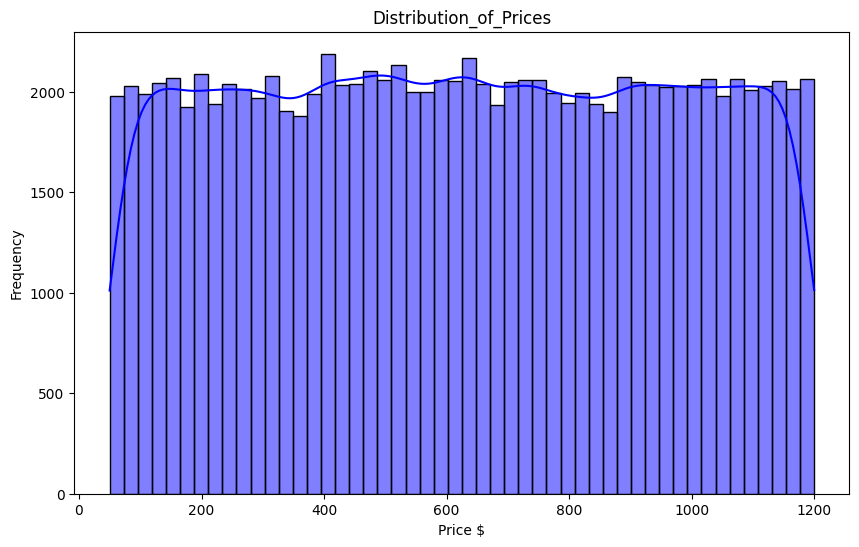

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=50,kde=True,color='blue')
plt.title("Distribution_of_Prices")
plt.xlabel('Price $')
plt.ylabel('Frequency')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

<Axes: xlabel='room type', ylabel='Count'>

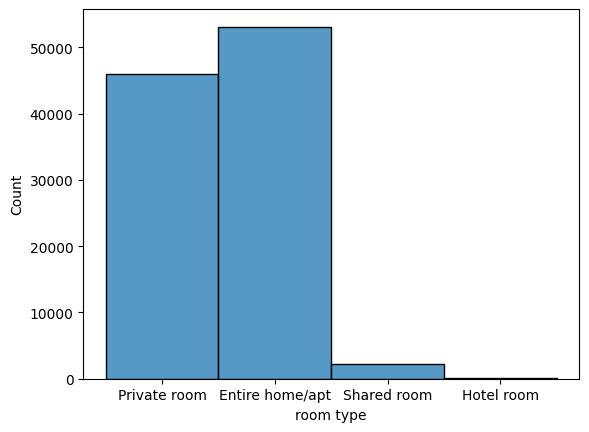

In [36]:
sns.histplot(x='room type',data=df)

In [37]:
fig=px.histogram(df,x='room type')

<Axes: xlabel='room type', ylabel='count'>

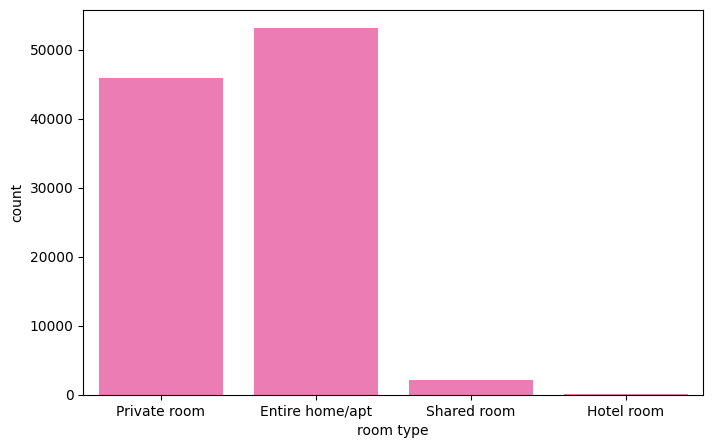

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(x='room type',data=df,color='hotpink')

In [38]:
fig.show()

Q4)What is the relationship bw Prcce and room Type


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

In [48]:
Avg_price=df.groupby('room type')['price'].mean().reset_index()

In [49]:
Avg_price

room type       price
0  Entire home/apt  625.380929
1       Hotel room  666.391304
2     Private room  624.841233
3      Shared room  634.542505

In [52]:
px.line(Avg_price,x='room type',y='price')

In [53]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='count', ylabel='neighbourhood group'>

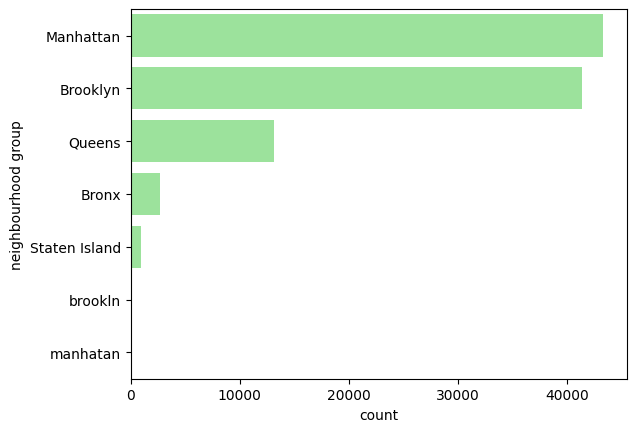

In [54]:
sns.countplot(y=df['neighbourhood group'],color='lightgreen',order=df['neighbourhood group'].value_counts().index)

In [62]:
px.histogram(df,x='neighbourhood group')